### Importing the modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

### Read the dataset

In [2]:
df = pd.read_csv("/content/placement.csv")

In [3]:
# First 5 rows
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
# No. of rows and columns
df.shape

(100, 4)

# Steps:

0. Preprocess + EDA + Feature Selection
1. Extract input and output features
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model

### Data Preprocessing

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


### Exploratory Data Analysis

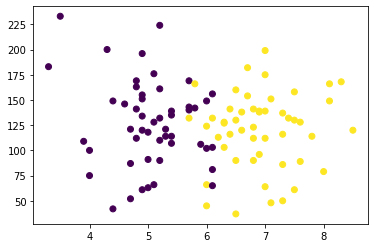

In [8]:
plt.scatter(df["cgpa"],df["iq"],c=df["placement"])

### Separating Independent and Dependent Features

In [9]:
X = df.drop("placement",axis=1)
y = df["placement"]

In [10]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [11]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [12]:
X.shape, y.shape

((100, 2), (100,))

### Performing Train, Test & Split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2)

In [14]:
X_train

,cgpa,iq
99,6.2,113.0
92,5.2,110.0
76,4.9,155.0
14,6.1,103.0
0,6.8,123.0
...,...,...
43,6.8,141.0
22,4.9,120.0
72,7.3,116.0
15,5.1,176.0


In [15]:
y_train

99    1
92    0
76    0
14    0
0     1
     ..
43    1
22    0
72    1
15    0
40    0
Name: placement, Length: 90, dtype: int64

In [16]:
X_test

,cgpa,iq
83,7.5,130.0
30,7.6,128.0
56,6.1,65.0
24,4.7,121.0
16,5.2,224.0
23,4.7,87.0
2,5.3,121.0
27,6.0,124.0
28,5.2,90.0
13,6.4,116.0


In [17]:
y_test

83    1
30    1
56    0
24    0
16    0
23    0
2     0
27    1
28    0
13    1
Name: placement, dtype: int64

### Feature Scaling

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Creation

In [20]:
model = LogisticRegression()

In [21]:
# Training the model
model.fit(X_train,y_train)

LogisticRegression()

In [22]:
# Performing prediction
model.predict(X_test)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [23]:
y_test

83    1
30    1
56    0
24    0
16    0
23    0
2     0
27    1
28    0
13    1
Name: placement, dtype: int64

### Model Evaluation

In [24]:
accuracy_score(y_test,model.predict(X_test))

0.9

In [25]:
evaluate = pd.DataFrame([model.predict(X_test),y_test],index=["Predicted","Original"])

In [26]:
evaluate

,0,1,2,3,4,5,6,7,8,9
Predicted,1,1,1,0,0,0,0,1,0,1
Original,1,1,0,0,0,0,0,1,0,1


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


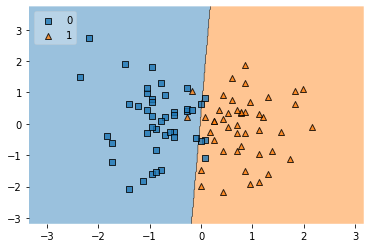

In [27]:
plot_decision_regions(X_train,y_train.values,clf=model,legend=2)

### Saving the Model

In [28]:
pickle.dump(model,open("model.pkl","wb"))